# boston house price dataset
using multiple linear regression (sklearn)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("boston.csv")

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 59.4 KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

In [7]:
# no null values in the dataset 

In [8]:
X = df.iloc[::, 1:14]
y = df.iloc[::,-1]

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
X.shape

(506, 13)

In [11]:
type(X)

pandas.core.frame.DataFrame

In [12]:
y.shape

(506,)

In [13]:
type(y)

pandas.core.series.Series

In [14]:
# X --> feature, dataframe
# y --> target, pandas series

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn. preprocessing import StandardScaler

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [18]:
# !pip install xgboost
# install xgboost in jupiter notebook

In [19]:
from xgboost import XGBRegressor

In [20]:
XGBR_model =XGBRegressor()
XGBR_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:
y_tran_prd = XGBR_model.predict(X_train)

In [22]:
y_test_prd = XGBR_model.predict(X_test)

In [23]:
# calculating mean values on training set

# absolute mean value
train_score1 = mean_absolute_error(y_train, y_tran_prd)
train_score2 = mean_squared_error(y_train, y_tran_prd)
train_score3 = r2_score(y_train, y_tran_prd)

print(train_score1)
print(train_score2)
print(train_score3)


0.0091330346494618
0.00016880599071692853
0.9999980039471451


In [24]:
# calculating mean values on test set

# absolute mean value
test_score1 = mean_absolute_error(y_test, y_test_prd)
test_score2 = mean_squared_error(y_test, y_test_prd)
test_score3 = r2_score(y_test, y_test_prd)

print(test_score1)
print(test_score2)
print(test_score3)

2.0748727686264927
7.9332706911154185
0.9051721149855378


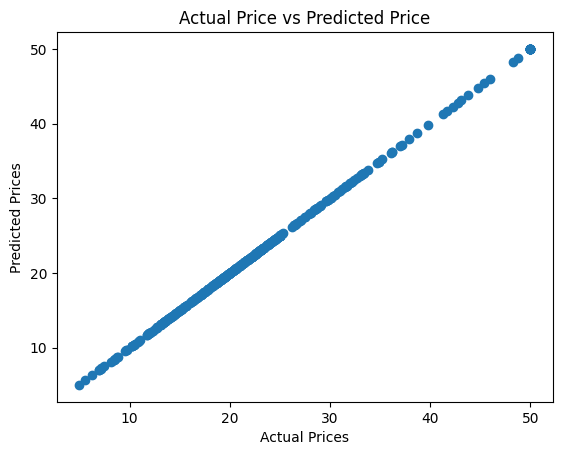

In [25]:
# using scatter plot on training dataset
plt.scatter(y_train, y_tran_prd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

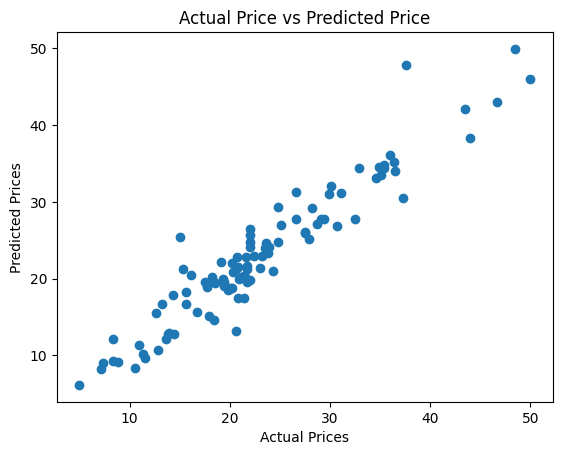

In [26]:
# using scatter plot on testing dataset
plt.scatter(y_test, y_test_prd)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [27]:
# compare the predicted y values vs the actual y values for the testing set

In [28]:
np.array(y_test)

array([20.2, 15.3, 37.3, 32.5,  8.8, 14.4, 22. , 26.6, 15. , 21.5, 29.4,
       24.8, 22. , 16.1, 13.9, 21.6, 21.7, 12.8,  7.2, 12.6, 20.7, 19.3,
       36.5, 17.7, 16.7, 20.2, 50. , 34.6, 35.4, 19.4, 20.8, 21.1, 31.1,
       23.5,  8.3, 15.6, 11.3, 21.7, 23.2, 20.8, 22. , 13.6, 28.7, 10.5,
       23. , 13.8, 36.4, 18.4, 30.1, 17.9, 29.9, 30.7,  5. , 35.4, 27.9,
       18.4, 18.5, 17.5, 15.6, 22.4, 20.3, 20.6, 19.8, 28.2, 35.1, 27.5,
       48.5, 27.5, 11.5, 22. , 13.2,  7.4, 20.6, 20.1, 25.1, 22. , 19.1,
       24.3, 19.4, 23.9, 34.9, 19.4, 21.4, 26.6, 37.6, 36. , 21.4, 23.6,
       24.8, 19.9, 20.9, 18.2, 10.9, 44. , 43.5,  8.3, 46.7, 32.9, 21.7,
       14.3, 29.1, 23.8])

In [29]:
y_test_prd

array([22.007828 , 21.22598  , 30.466019 , 27.735027 ,  9.134951 ,
       12.740403 , 25.738058 , 27.750889 , 25.364376 , 20.229292 ,
       27.821787 , 24.7761   , 19.771252 , 20.497349 , 12.970438 ,
       22.86288  , 19.605635 , 10.677987 ,  8.277654 , 15.529657 ,
       22.842052 , 20.002996 , 34.06762  , 18.943192 , 15.624948 ,
       18.787666 , 46.0246   , 33.05114  , 34.804283 , 19.070232 ,
       17.53711  , 20.27066  , 31.102339 , 24.026129 , 12.199101 ,
       18.224184 , 10.182956 , 21.252314 , 22.891352 , 21.458113 ,
       26.451164 , 12.1898775, 27.141438 ,  8.322471 , 21.356699 ,
       12.768549 , 35.221687 , 14.574406 , 32.06173  , 15.088605 ,
       31.076805 , 26.808199 ,  6.1558666, 34.42615  , 25.135347 ,
       19.508772 , 19.424906 , 19.58183  , 16.680052 , 22.962534 ,
       20.904106 , 21.24     , 18.46788  , 29.243906 , 33.434864 ,
       26.021257 , 49.91979  , 25.905489 ,  9.713634 , 24.058743 ,
       16.63922  ,  9.0341625, 13.197622 , 18.80479  , 26.9856